In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


data = pd.read_csv('../default_data/bigboss_book.csv')

display(data)

/tmp/ipykernel_4792/4154400086.py:9: DtypeWarning: Columns (18,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../default_data/bigboss_book.csv')


,id,title,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,...,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86
0,630104,Inner Circle,(Private #5),"Kate Brian, Julian Peploe",7597,196,"4,03",3045,2323,1748,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9487,A Time to Embrace,(Timeless Love #2),Karen Kingsbury,4179,177,"4,35",2255,1290,518,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6050894,Take Two,(Above the Line #2),Karen Kingsbury,6288,218,"4,23",3000,2020,1041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39030,Reliquary,(Pendergast #2),"Douglas Preston, Lincoln Child",38382,1424,"4,01",12711,15407,8511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,998,The Millionaire Next Door: The Surprising Secr...,NaN,"Thomas J. Stanley, William D. Danko",72168,3217,"4,04",27594,25219,14855,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52194,15743072,The Stranger I Married,NaN,Sylvia Day,13295,805,"3,87",4220,4733,3116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52195,18143905,The Opposite of Loneliness: Essays and Stories,NaN,Marina Keegan,42609,4282,"3,84",12461,15191,11202,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52196,1466878,Sadako will leben,NaN,Karl Bruckner,1583,64,"4,17",673,592,251,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52197,630103,Confessions,(Private #4),Kate Brian,8815,258,"4,09",3760,2734,1780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# keep only the columns we want to analyze
data = data[["rating_count", "review_count", "average_rating", "number_of_pages", "date_published"]]

display(data)

,rating_count,review_count,average_rating,number_of_pages,date_published
0,7597,196,"4,03",220.0,January 1st 2007
1,4179,177,"4,35",400.0,October 29th 2006
2,6288,218,"4,23",320.0,January 1st 2009
3,38382,1424,"4,01",464.0,1997
4,72168,3217,"4,04",258.0,October 28th 1995
...,...,...,...,...,...
52194,13295,805,"3,87",312.0,2007
52195,42609,4282,"3,84",208.0,April 8th 2014
52196,1583,64,"4,17",264.0,1961
52197,8815,258,"4,09",240.0,April 24th 2007


In [3]:
# transform to keep only the year of the date_published
data["date_published"] = data["date_published"].str.extract(r"(\d{4})")
data["date_published"] = data["date_published"].astype(float)

# transforme average_rating en float
data["average_rating"] = data["average_rating"].str.replace(",", ".")
data["average_rating"] = data["average_rating"].astype(float)


display(data)

,rating_count,review_count,average_rating,number_of_pages,date_published
0,7597,196,4.03,220.0,2007.0
1,4179,177,4.35,400.0,2006.0
2,6288,218,4.23,320.0,2009.0
3,38382,1424,4.01,464.0,1997.0
4,72168,3217,4.04,258.0,1995.0
...,...,...,...,...,...
52194,13295,805,3.87,312.0,2007.0
52195,42609,4282,3.84,208.0,2014.0
52196,1583,64,4.17,264.0,1961.0
52197,8815,258,4.09,240.0,2007.0


In [4]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.decomposition import PCA


# standardize the data
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

# remove NaN
scaled_data = np.nan_to_num(scaled_data)

## make the PCA (with 4 components)
pca = PCA(n_components=4)
pca.fit(scaled_data)
pca_res = pca.transform(scaled_data)

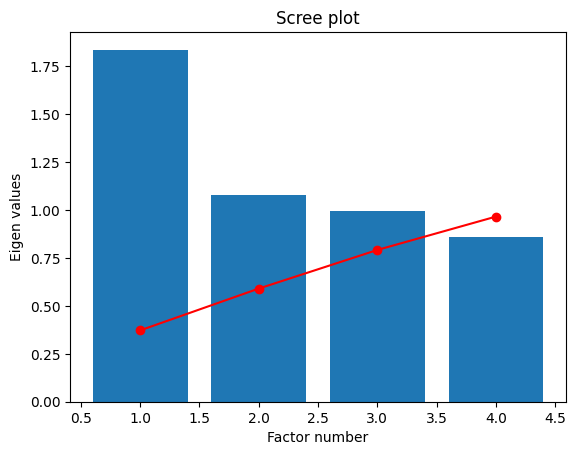

In [5]:
# display pourcentage of variance explained by each component
eig = pca.explained_variance_
# graphique des valeurs propres % cumulé
plt.bar(range(1, len(eig) + 1), eig)
plt.plot(range(1, len(eig) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', color='r')
plt.title("Scree plot")
plt.xlabel("Factor number")
plt.ylabel("Eigen values")
plt.show()

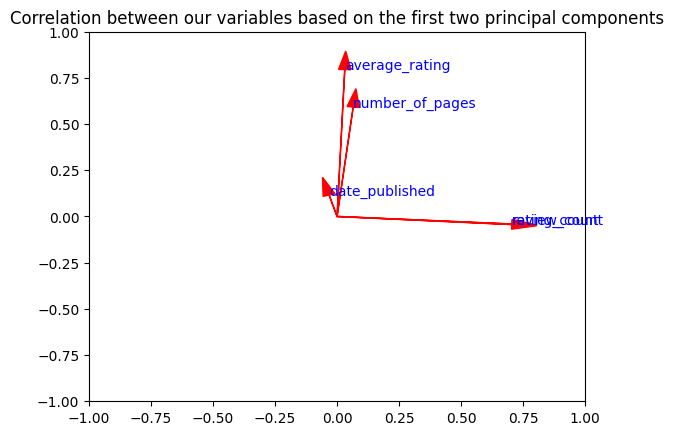

In [6]:
## analyze the variables on the first two components
fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
for i in range(len(data.columns)):
    ax.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], head_width=0.05, head_length=0.1, fc='r', ec='r')
    plt.text(pca.components_[0, i], pca.components_[1, i], data.columns[i], color='b')
plt.title("Correlation between our variables based on the first two principal components")
plt.show()

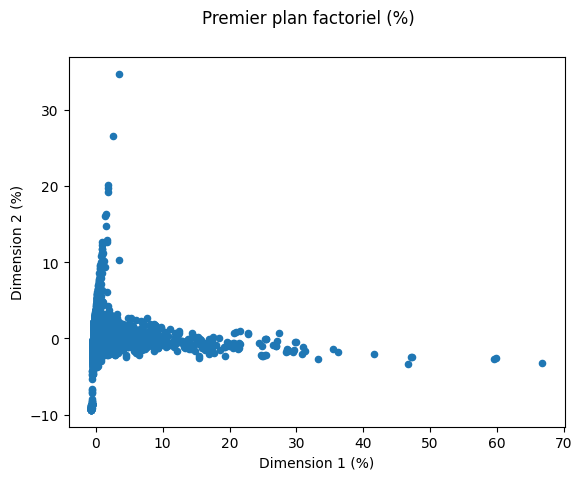

In [7]:
# (useless) display a scatter plot 
pcadf = pd.DataFrame({
    "Dim1": pca_res[:, 0],
    "Dim2": pca_res[:, 1]
})
pcadf.plot.scatter("Dim1", "Dim2")
plt.xlabel("Dimension 1 (%)")
plt.ylabel("Dimension 2 (%)")
plt.suptitle("Premier plan factoriel (%)")
plt.show()